In [1]:
import nbformat as nbf

### Орешкина Юлия
### 492 группа
### 16.02.2017
# Задача 5

In [50]:
# Parse data from file
obj = open("task5_HW1.txt","r").readlines()
for i in range(len(obj)):
    obj[i] = ((obj[i].split(". "))[1].split('('))
    obj[i][1] = (obj[i][1].replace(')\n','')).split(', ')
    if obj[i][0]=='Uniform':
        obj[i][1][0] = obj[i][1][0].replace('{','')
        obj[i][1][2] = obj[i][1][2].replace('}','')
        obj[i][1] = [obj[i][1][0],obj[i][1][2]]

In [60]:
import numpy as np
import math
import numpy.random as rnd
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline
INF = 100000

In [61]:
# build necessary distribution for any string from file
dict_of_func = {
    'N': lambda x,y: sts.norm(x,math.sqrt(y)),
    'Beta': lambda x,y: sts.beta(x,y),
    'Gamma': lambda x,y: sts.gamma(y,1/x),
    'Uniform': lambda x,y: sts.uniform(x,y-x),
    'Bin': lambda x,y: sts.binom(x,y)
}
def distr(name, a, b, n):
    return np.array(dict_of_func[name](a,b).rvs(size=n))

Для заданного распределения сгенерируем несколько выборок и исследуем их реализации

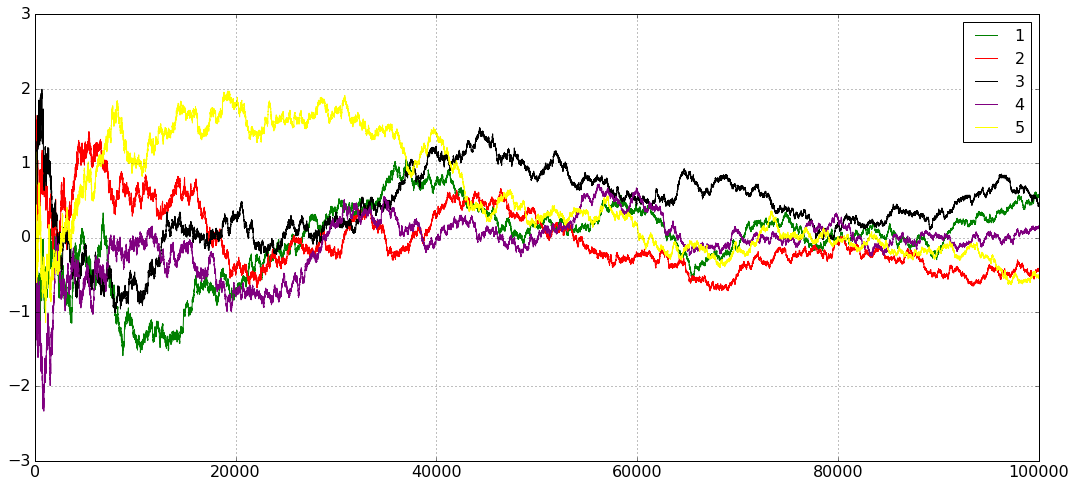

In [140]:
i = 17

name = obj[i][0]
a = float(obj[i][1][0])
b = float(obj[i][1][1])
db = dict_of_func[name](a,b)
n = np.arange(1,INF+1)
mean = db.mean()
var = db.var()
stat = []
count = 5

# подсчитываем статистики выборки данного распределения в зависимости от кол-ва случайных величин
for i in range(count):
    sample = distr(name,a,b,INF)
    stat.append(((np.cumsum(sample) - n*mean)/np.sqrt(n*var)))

plt.figure(figsize=(18, 8))
plt.plot(n,stat[0],color='green', label='1')
plt.plot(n,stat[1],color='red', label='2')
plt.plot(n,stat[2],color='black', label='3')
plt.plot(n,stat[3],color='purple', label='4')
plt.plot(n,stat[4],color='yellow', label='5')
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


Видим, что значения $T_i$ для различных i сильно варьируются, сходимости не наблюдается, т.к. на каждом следующем шаге значение статистики изменяется в зависимости от случайной величины из нашего распределения. Данные графики неинформативны для исследования статистики

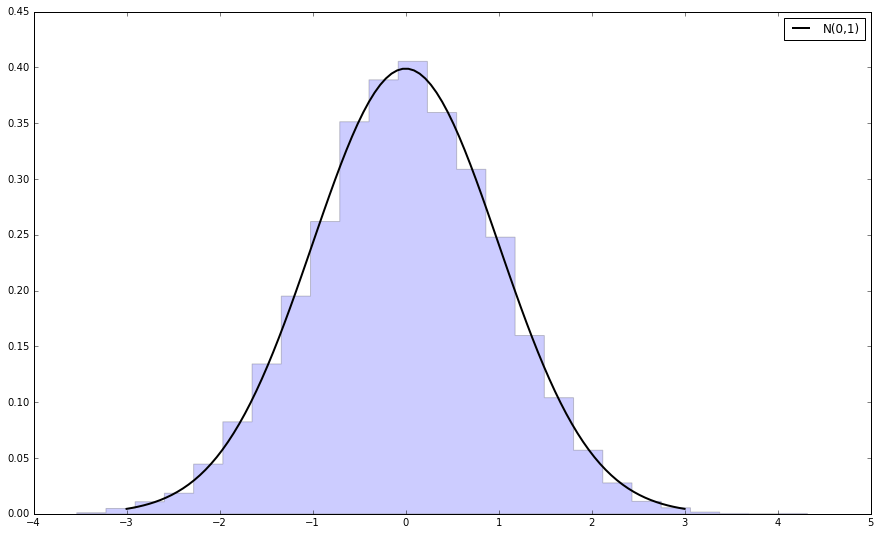

In [162]:
INF = 100
count = 10000
stat = []
for i in range(count):
    sample = distr(name,a,b,INF)
    summa = sample.sum()
    stat.append((summa - INF*mean)/math.sqrt(INF*var))

n = np.linspace(-3,3,INF)
plt.figure(figsize=(15,9))
plt.hist(stat,bins=25,normed=True, histtype='stepfilled', alpha=0.2)
r = sts.norm()
plt.plot(n, r.pdf(n), 'k-', lw=2, label='N(0,1)')
plt.legend(loc='best')
plt.show()

Как видим, распределение случайных величин из заданного в условии задачи распределения близко к нормальному с параметрами 0, 1. 
Из этого делаем вывод, что ЦПТ выполняется